In [1]:
#Installing Pandas and scikit-learn library
!pip install pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#importing pandas and dataset from scikit-learn datasets
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

df =pd.DataFrame(data.data, columns=data.feature_names)

df["Target"] = data.target

#printing the top 5 values
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [3]:
#checking for total null values
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [4]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [6]:
print(df.dtypes)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object


Step 3: Data Preprocessing
Normalize the numerical columns to ensure all features are on the same scale, which helps many machine learning algorithms perform better.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Target',axis=1)
y = df['Target']

X_train,X_test,  Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

#Normalise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4: Building the Model (Linear Regression)
Now we’ll build a simple linear regression model to predict house prices based on the features.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(X_train_scaled, Y_train)

Y_predict = model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)

print(f"Mean Sqaured Error:{mse}")
print(f"Mean Absolute Error:{mae}")

Mean Sqaured Error:0.5558915986952444
Mean Absolute Error:0.5332001304956564


In [11]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


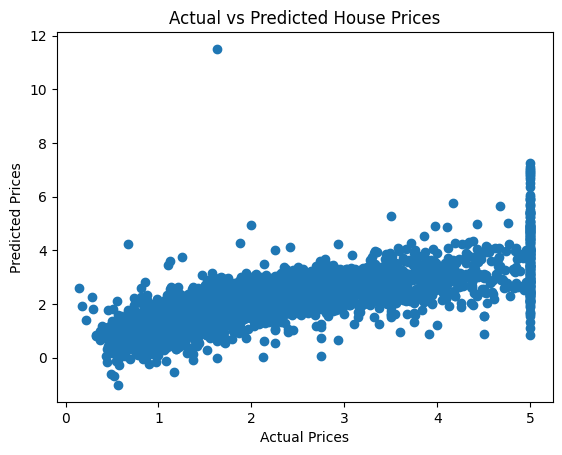

In [12]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

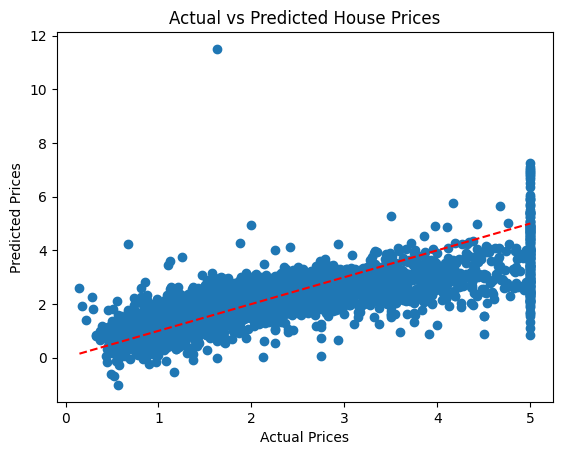

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(Y_test, Y_predict)

# Add the diagonal line for perfect predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, Y_train)

# Predict and evaluate
y_tree_pred = tree_model.predict(X_test_scaled)
tree_mse = mean_squared_error(Y_test, y_tree_pred)
tree_mae = mean_absolute_error(Y_test, y_tree_pred)

print(f"Decision Tree MSE: {tree_mse}")
print(f"Decision Tree MAE: {tree_mae}")


Decision Tree MSE: 0.49396854311945243
Decision Tree MAE: 0.45390448401162786


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, Y_train)

# Predict and evaluate
y_rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(Y_test, y_rf_pred)
rf_mae = mean_absolute_error(Y_test, y_rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")

Random Forest MSE: 0.255169737347244
Random Forest MAE: 0.3274252027374032


In [16]:
from sklearn.svm import SVR

# Initialize and train the Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, Y_train)

# Predict and evaluate
y_svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(Y_test, y_svr_pred)
svr_mae = mean_absolute_error(Y_test, y_svr_pred)

print(f"Support Vector Regressor MSE: {svr_mse}")
print(f"Support Vector Regressor MAE: {svr_mae}")


Support Vector Regressor MSE: 0.35700403193386515
Support Vector Regressor MAE: 0.39859907695205377


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train_scaled, Y_train)

# Predict and evaluate
y_gb_pred = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(Y_test, y_gb_pred)
gb_mae = mean_absolute_error(Y_test, y_gb_pred)

print(f"Gradient Boosting MSE: {gb_mse}")
print(f"Gradient Boosting MAE: {gb_mae}")


Gradient Boosting MSE: 0.29399901242474274
Gradient Boosting MAE: 0.37165044848436773


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


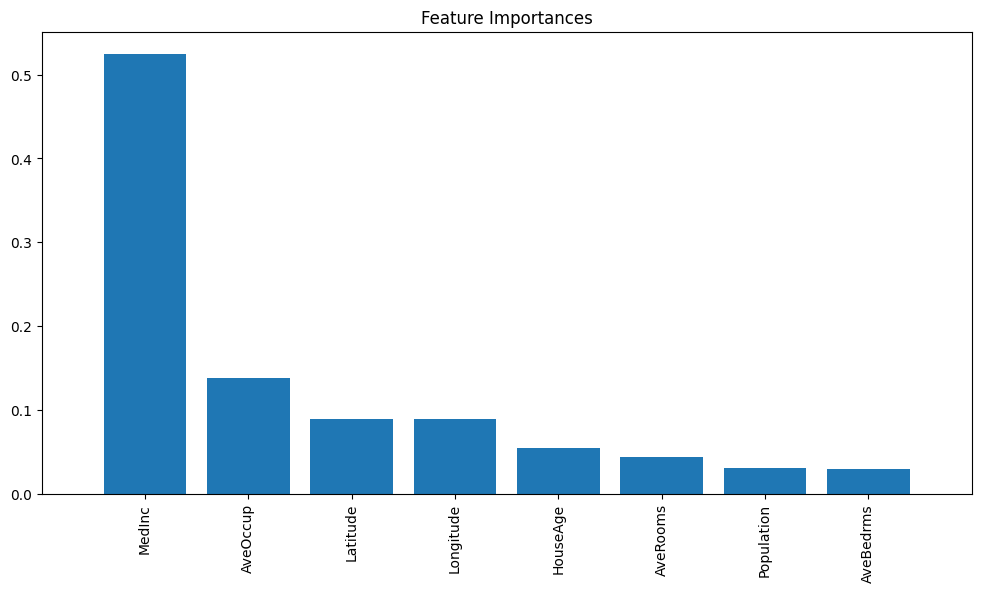

In [19]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())


NameError: name 'y_train' is not defined